In [2]:
import torch
import os
import networks
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

In [58]:
input_nc = 3
output_nc = 3
ngf = 64
netG = "unet_256"
norm = "batch"
no_dropout = False
init_type = "normal"
init_gan = 0.02
model = networks.define_G(input_nc, output_nc, ngf, netG, norm, not no_dropout, init_type, init_gan)

initialize network with normal


In [59]:
model_path = "./checkpoints/denoise_pix2pix/latest_net_G.pth"
model.load_state_dict(torch.load(model_path, map_location='cpu'))

In [60]:
model.eval()

UnetGenerator(
  (model): UnetSkipConnectionBlock(
    (model): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): UnetSkipConnectionBlock(
        (model): Sequential(
          (0): LeakyReLU(negative_slope=0.2, inplace)
          (1): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
          (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): UnetSkipConnectionBlock(
            (model): Sequential(
              (0): LeakyReLU(negative_slope=0.2, inplace)
              (1): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
              (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (3): UnetSkipConnectionBlock(
                (model): Sequential(
                  (0): LeakyReLU(negative_slope=0.2, inplace)
                  (1): Conv2d(256, 512, kernel_size=(4

In [61]:
class MyDataset(Dataset):
    def __init__(self, img_path, transform = None):
        self.transform = transform
        self.img_path = img_path
    def __len__(self):
        return 1
    def __getitem__(self, idx):
        image = Image.open(self.img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

In [62]:
def tensor2im(input_image, imtype=np.uint8):
    """"Converts a Tensor array into a numpy image array.

    Parameters:
        input_image (tensor) --  the input image tensor array
        imtype (type)        --  the desired type of the converted numpy array
    """
    if not isinstance(input_image, np.ndarray):
        if isinstance(input_image, torch.Tensor):  # get the data from a variable
            image_tensor = input_image.data
        else:
            return input_image
        image_numpy = image_tensor[0].cpu().float().numpy()  # convert it into a numpy array
        if image_numpy.shape[0] == 1:  # grayscale to RGB
            image_numpy = np.tile(image_numpy, (3, 1, 1))
        image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0  # post-processing: tranpose and scaling
    else:  # if it is a numpy array, do nothing
        image_numpy = input_image
    return image_numpy.astype(imtype)

In [63]:
my_transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [64]:
my_dataset = MyDataset("test.jpg", my_transforms)

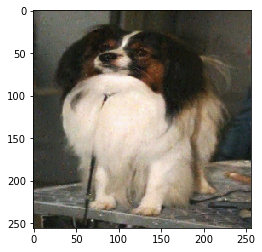

In [65]:
for i in range(len(my_dataset)):
    sample = my_dataset[i]
    a = model.forward(sample.unsqueeze(0))
    result_img = tensor2im(a)
    plt.imshow(result_img)

In [ ]:
c = cv2.